# A journey through the Pacific Northwest

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import librosa

from IPython.display import Audio

IMAGE_PATH = 'images/'
SOUND_PATH = 'sounds/'

### 1.1 Correlation in Signals

In [3]:
flicker, flicker_sr = librosa.load(SOUND_PATH + 'flicker.mp3')

display(Audio(flicker, rate=flicker_sr))

In [4]:
def calculate_sound_autocorrelation(y, sr, max_lag):
    # Calculate autocorrelation using numpy
    autocorr = np.correlate(y, y, mode='full')
    autocorr = autocorr[autocorr.size // 2:]  # Keep only the second half
    
    # Normalize the autocorrelation
    autocorr /= autocorr.max()

    # Consider only lags up to max_lag
    lags = np.arange(0, max_lag)
    autocorr = autocorr[:max_lag]

    return lags, autocorr

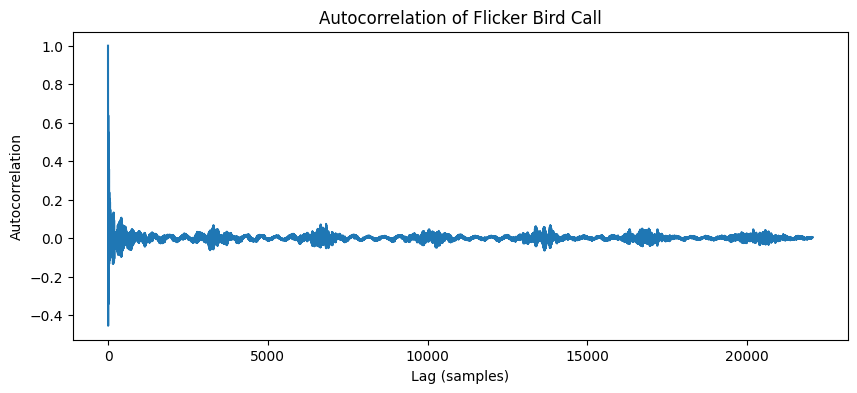

In [5]:
lags, autocorr = calculate_sound_autocorrelation(flicker, flicker_sr, flicker_sr)

plt.figure(figsize=(10, 4))
plt.plot(lags, autocorr)
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Flicker Bird Call')
plt.show()

#### Measuring periodicity numerically

In [6]:
from scipy.signal import find_peaks

peak_samples, peak_correlations = find_peaks(autocorr, height=0.03, distance=1000)

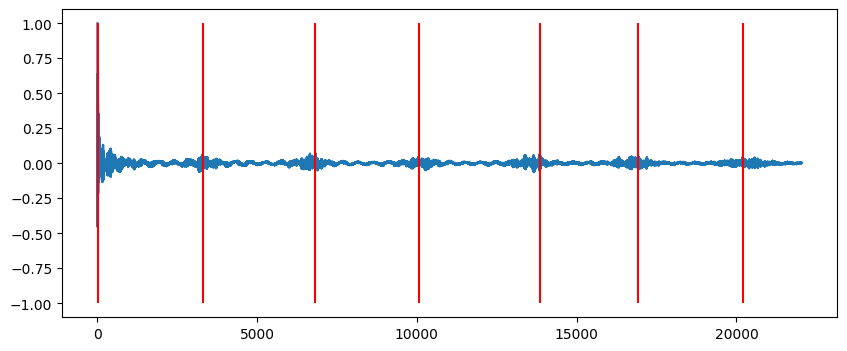

In [7]:
# plot autocorrelation with samples marked
plt.figure(figsize=(10, 4))
plt.plot(lags, autocorr)

# mark the samples with red bars
plt.vlines(peak_samples, -1, 1, color='r')

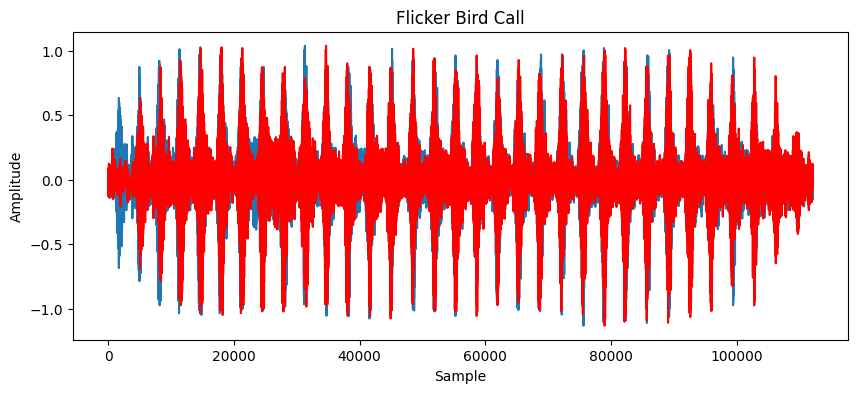

In [8]:
# average difference between peaks
avg_peak_diff = np.diff(peak_samples).mean()
flicker_shifted = np.roll(flicker, int(avg_peak_diff))

# plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(flicker)
plt.plot(flicker_shifted, color='r')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Flicker Bird Call')
plt.show()

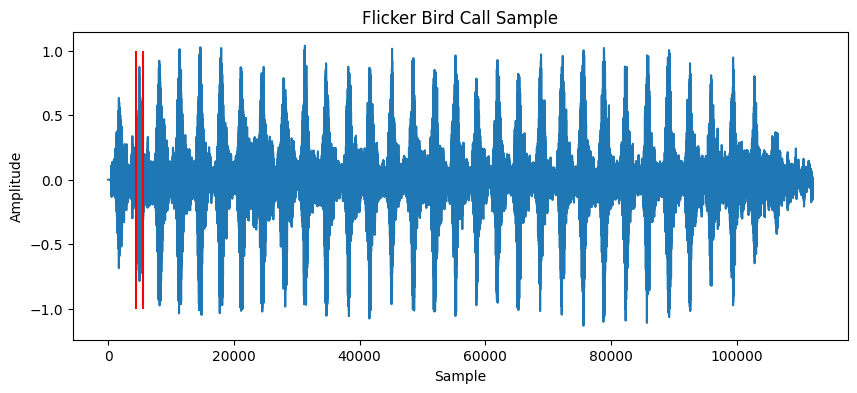

In [9]:
sample_window = (4500, 5500)
flicker_sample = flicker[sample_window[0]:sample_window[1]]

# plot the sample
plt.figure(figsize=(10, 4))
plt.plot(flicker)
plt.vlines(sample_window, -1, 1, color='r')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Flicker Bird Call Sample')
plt.show()

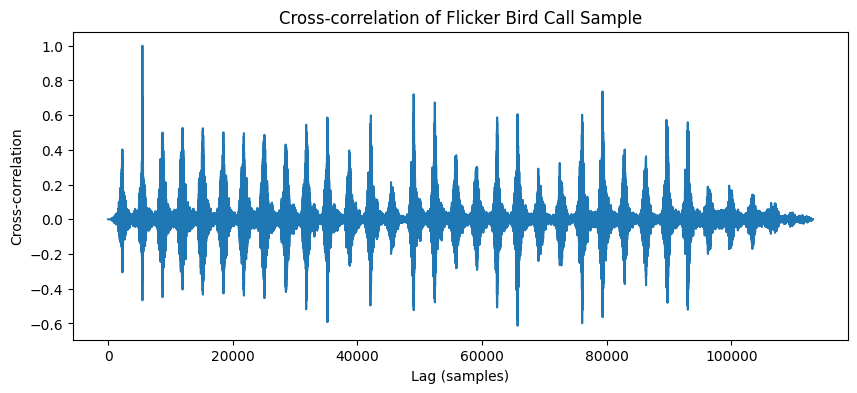

In [10]:
# find the flicker_sample in the flciker signal with cross-correlation
cross_corr = np.correlate(flicker, flicker_sample, mode='full')
#cross_corr = cross_corr[cross_corr.size // 2:]  # Keep only the second half

# normalize the cross-correlation
cross_corr /= cross_corr.max()

# plot the cross-correlation
plt.figure(figsize=(10, 4))
plt.plot(cross_corr)
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation of Flicker Bird Call Sample')
plt.show()


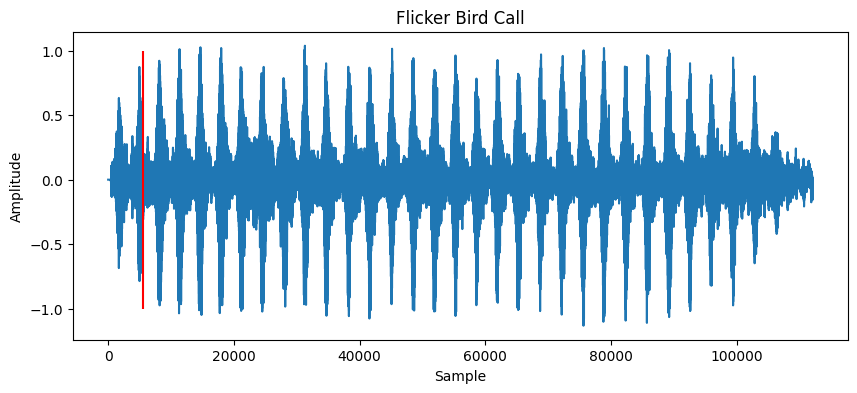

In [11]:
sample_position = cross_corr.argmax()

# plot the flicker signal and mark the sample_position with a vline
plt.figure(figsize=(10, 4))
plt.plot(flicker)
plt.vlines(sample_position, -1, 1, color='r')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Flicker Bird Call')
plt.show()

### 1.2 Segmentation, morphological operations, object attributes in images

Segmentation Techniques:
- Threshold-based segmentation
- Edge-based image segmentation
- Region-based image segmentation
- Clustering-based image segmentation
- Artificial neural network-based segmentation

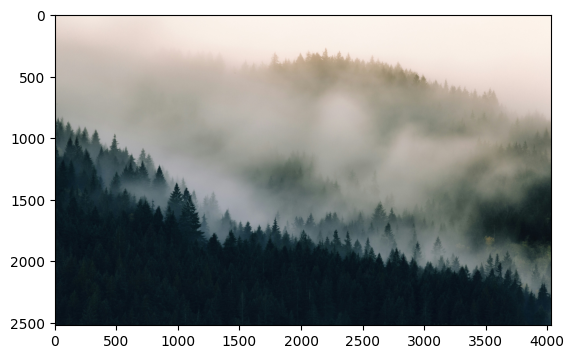

In [12]:
issaquah_forest = cv2.imread(IMAGE_PATH + 'issaquah_forest.jpg')

plt.imshow(cv2.cvtColor(issaquah_forest, cv2.COLOR_BGR2RGB))

Source: Issaquah Forest Photo by <a href="https://unsplash.com/@iamthedave?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Dave Hoefler</a> on <a href="https://unsplash.com/photos/forest-covered-with-fogs-rcE3_D-u2NE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

https://www.youtube.com/watch?v=YQ2wIOcO7aE&ab_channel=AppleseedOutdoors

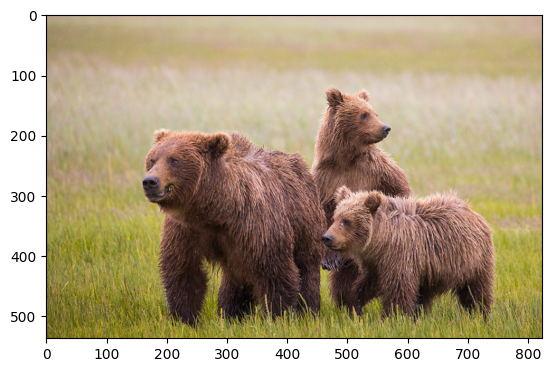

In [13]:
# load new image
bear_family = cv2.imread(IMAGE_PATH + 'brown_bear_family.png')

plt.imshow(cv2.cvtColor(bear_family, cv2.COLOR_BGR2RGB))

Source: https://my-photo-blog.com/brown-bear-family

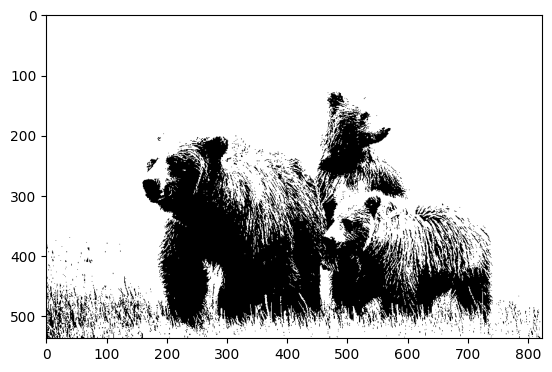

In [22]:
# binarize the image of the bear fmaily
bear_family_gray = cv2.cvtColor(bear_family, cv2.COLOR_BGR2GRAY)
bear_family_bin = bear_family_gray > 100

plt.imshow(bear_family_bin, cmap='gray')


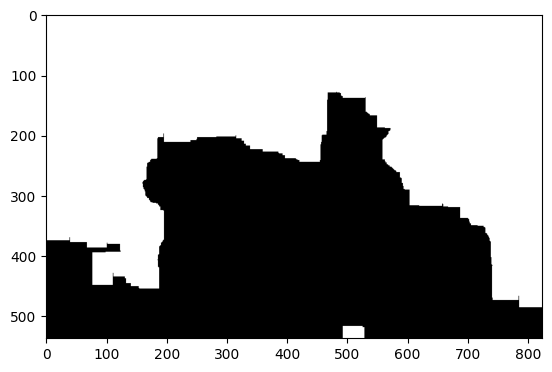

In [28]:
# apply erosion and dilation
kernel = np.ones((9, 9), np.uint8)
bear_family_bin_eroded = cv2.erode(bear_family_bin.astype(np.uint8), kernel, iterations=4)
bear_family_bin_eroded_dilated = cv2.dilate(bear_family_bin_eroded, kernel, iterations=4)

# plot the binarized image
plt.imshow(bear_family_bin_eroded_dilated, cmap='gray')